<a href="https://colab.research.google.com/github/thetrotfreak/MCA572/blob/cv/2347111_P7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision Lab 7

> Bivas Kumar

> 2347111

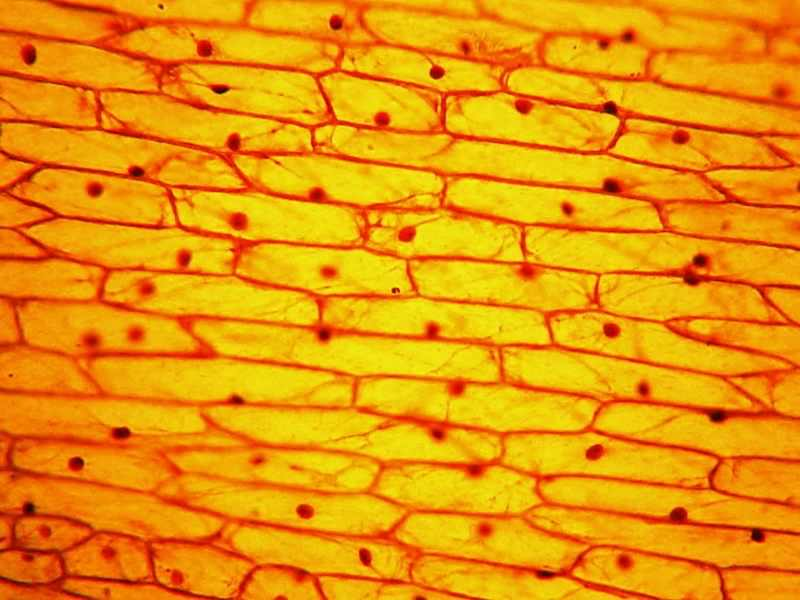

In [19]:
import cv2
from google.colab.patches import cv2_imshow

image_path = "/content/drive/MyDrive/Trimester/5/cv/bananaCell.jpg"
image = cv2.imread(image_path)

cv2_imshow(image)

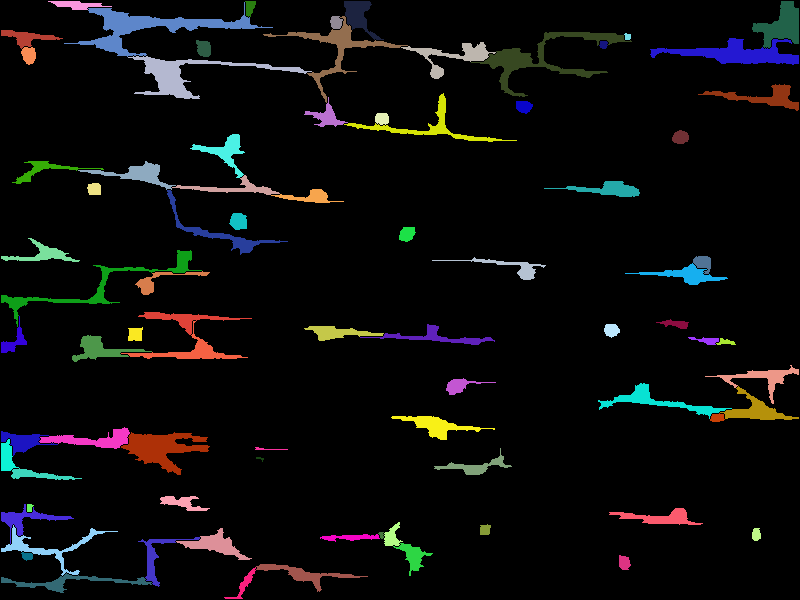

In [20]:
import random
import numpy as np
from matplotlib import pyplot as plt

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply CLAHE to improve contrast
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_gray = clahe.apply(gray)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(enhanced_gray, (5, 5), 0)

# Use adaptive thresholding for better contrast
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Erosion to highlight cell boundaries
eroded = cv2.erode(thresh, None, iterations=2)

# Perform distance transform
distance_transform = cv2.distanceTransform(eroded, cv2.DIST_L2, 5)
_, fg_markers = cv2.threshold(distance_transform, 0.4 * distance_transform.max(), 255, 0)
fg_markers = np.uint8(fg_markers)

# Define background
bg_markers = cv2.dilate(thresh, None, iterations=3)
unknown = cv2.subtract(bg_markers, fg_markers)

# Create markers for watershed
_, markers = cv2.connectedComponents(fg_markers)
markers = markers + 1
markers[unknown == 255] = 0

# Apply watershed
markers = cv2.watershed(image, markers)

# Generate output with random colors for each cell
output = np.zeros_like(image, dtype=np.uint8)
for marker in np.unique(markers):
    if marker in [-1, 1]:  # Skip boundaries and background
        continue
    color = [random.randint(0, 255) for _ in range(3)]
    output[markers == marker] = color

cv2_imshow(output)